In [27]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import scipy.stats as st
from scipy.stats import zscore
from scipy.stats import mannwhitneyu
import statsmodels.formula.api as smf


%config IPCompleter.greedy = True

In [2]:
sns.set(
    font_scale = 2,
    style      = 'whitegrid',
    rc         = {'figure.figsize':(18,8)}
)

In [3]:
df = pd.read_excel('тест_ряды.xlsx', index_col='Дата')
df.head(3)

,Показатель 1,Показатель 2,Показатель 3,Показатель 4,Показатель 5
Дата,,,,,
2020-04-15,1.774,5.116301,4.431975,2.93,3.4
2020-04-16,1.370,5.394880,4.701574,2.99,3.4
2020-04-17,1.959,5.726697,5.048438,3.21,3.4


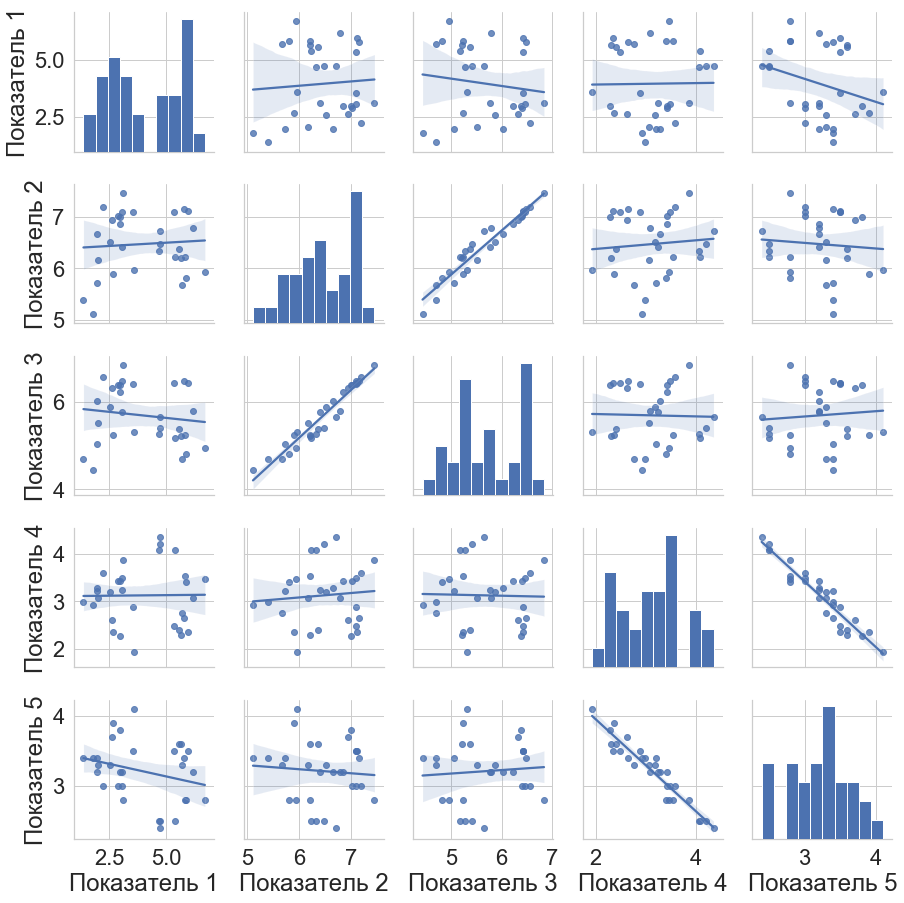

In [4]:
sns.pairplot(df, kind = 'reg')

Провизуализировав регрессию, мы видим что есть 2 пары которые тесно связаны. Это 2я с 3й и 4я с 5ой.


In [5]:
df.corr()

,Показатель 1,Показатель 2,Показатель 3,Показатель 4,Показатель 5
Показатель 1,1.000000,0.069614,-0.133975,0.012170,-0.270906
Показатель 2,0.069614,1.000000,0.967179,0.088277,-0.079147
Показатель 3,-0.133975,0.967179,1.000000,-0.025068,0.077892
Показатель 4,0.012170,0.088277,-0.025068,1.000000,-0.953597
Показатель 5,-0.270906,-0.079147,0.077892,-0.953597,1.000000


2-3 сильная положительная корреляция, а 4-5 сильная отрицательная.

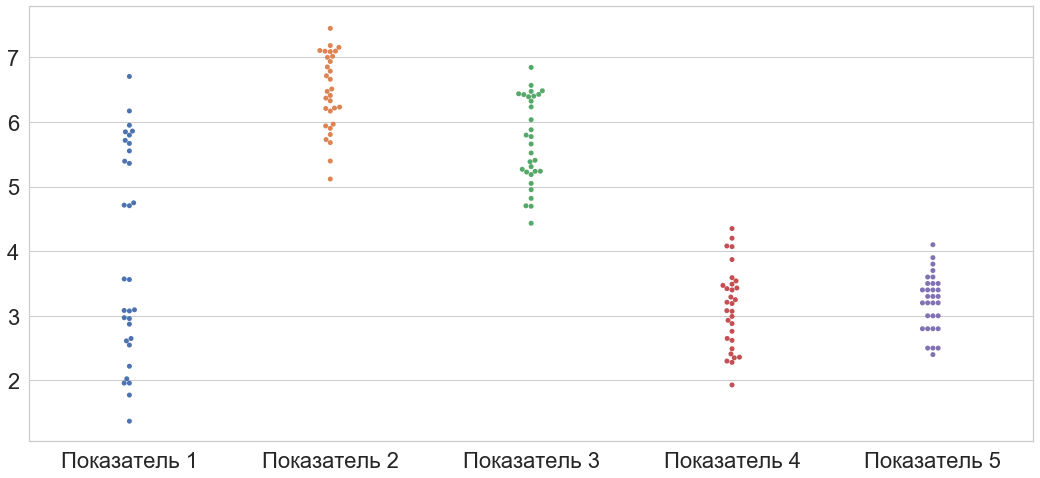

In [6]:
sns.swarmplot(data=df)

Дисперсия 1го наблюдения сильно выше чем у остальных.

In [7]:
# Нарисуем линейные графики

def f(x):
    return x.replace(' ', '_').lower()
df.rename(columns=f, inplace=True)

df_1 = df.показатель_1
df_2 = df.показатель_2
df_3 = df.показатель_3
df_4 = df.показатель_4
df_5 = df.показатель_5

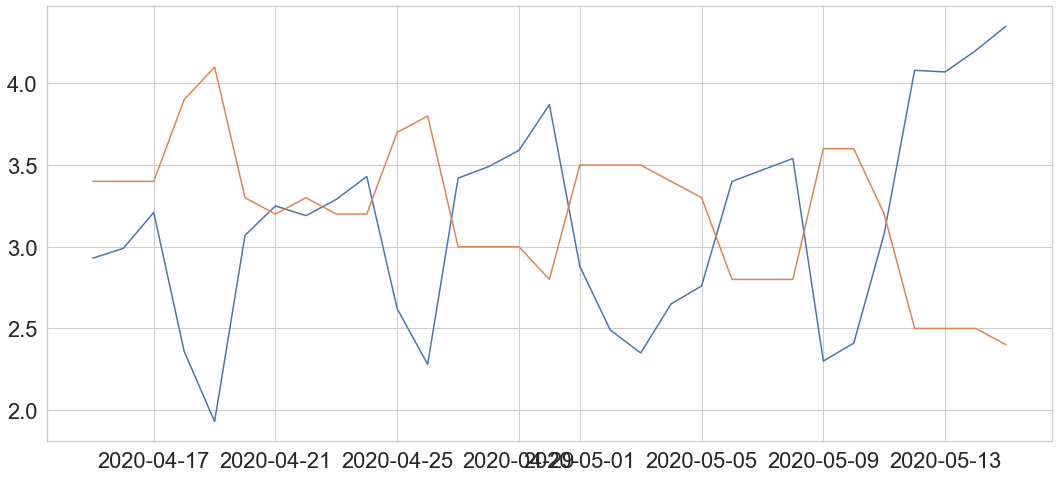

In [8]:
# Как и было видно раньше, с ростом 1й переменной, падает другая и наоборот.

sns.lineplot(data=df_4)
sns.lineplot(data=df_5)

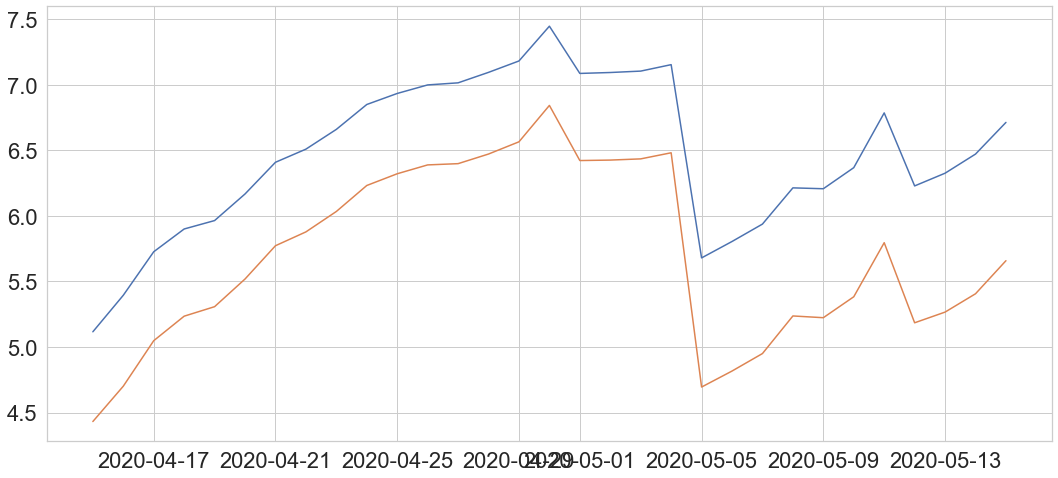

In [9]:
# А эти 2 переменные тесно связаны между собой.

sns.lineplot(data=df_2)
sns.lineplot(data=df_3)

1. На первом графике(4-5) видно что он сильно колеблется примерно в недельном интревале и если не появятся другие независимые переменные, то скорее всего он так продолжит колебаться в этих интервалах(опираясь на этот месяц)
2. 2й график если в следующем месяце продолжит двигаться как и прежде, то он снова пойдет вверх до спада(каждый новый старт выше предыдущего). Но конечно это очень маловероятно, вообще график похож на ситуацию с выходом на карантин в паре рубль/доллар, только там был больше интервал)))

In [10]:
# Сделаем Z-преобразование, для наглядного сравнения распределений

df_z = pd.DataFrame({'показатель_1': zscore(df_1), 
                     'показатель_2': zscore(df_2), 
                     'показатель_3': zscore(df_3), 
                     'показатель_4': zscore(df_4), 
                     'показатель_5': zscore(df_5)}, index=df.index)

In [11]:
# Посмотрим насколько наши ряды отличаются друг от друга в стандартных отклонениях

np.sqrt(np.square(df_z)).describe()

,показатель_1,показатель_2,показатель_3,показатель_4,показатель_5
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.925442,0.845119,0.884311,0.822954,0.806790
std,0.385152,0.543415,0.474616,0.577499,0.600605
min,0.238703,0.004130,0.054738,0.077436,0.030482
25%,0.581959,0.430652,0.549961,0.363209,0.441989
50%,0.904649,0.914223,0.949841,0.673742,0.678224
75%,1.202340,1.121065,1.152726,1.261356,1.063060
max,1.727336,2.334298,1.913092,1.996466,2.095637


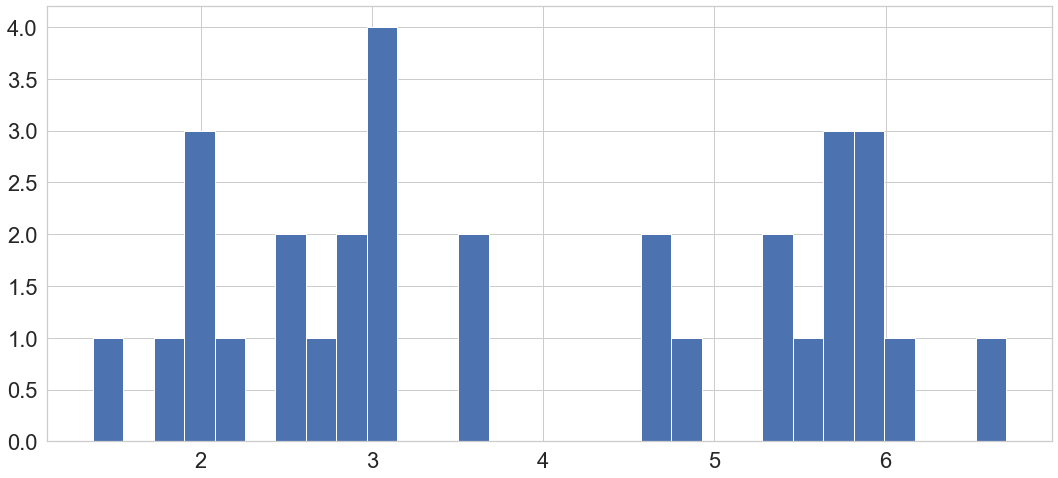

In [12]:
# Похоже что по первому показателю наблюдения можно разделить на 2 группы, до 3.6 и более 4.7

df_1.hist(bins=30)

In [13]:
# Разделим на 2 группы

group_1 = df.query('показатель_1 < 3.6')
group_2 = df.query('показатель_1 > 3.6')

In [14]:
# Проверка на нормальность

print(f'Значения показателя_1 во всей выборке: {stats.shapiro(df.показатель_1)}')
print(f'Значения показателя_1 в группе 1 : {stats.shapiro(group_1.показатель_1)}')
print(f'Значения показателя_1 в группе 2: {stats.shapiro(group_2.показатель_1)}')

Значения показателя_1 во всей выборке: (0.9088602662086487, 0.012082450091838837)
Значения показателя_1 в группе 1 : (0.9544172286987305, 0.5299884676933289)
Значения показателя_1 в группе 2: (0.9324934482574463, 0.330600768327713)


Кроме показателя_1, остальные убедительно прохотят тест на нормальность распределения. Сравним как группы коррелируют с переменными теперь.

In [15]:
df.corr() # Корреляция до разделения на группы

,показатель_1,показатель_2,показатель_3,показатель_4,показатель_5
показатель_1,1.000000,0.069614,-0.133975,0.012170,-0.270906
показатель_2,0.069614,1.000000,0.967179,0.088277,-0.079147
показатель_3,-0.133975,0.967179,1.000000,-0.025068,0.077892
показатель_4,0.012170,0.088277,-0.025068,1.000000,-0.953597
показатель_5,-0.270906,-0.079147,0.077892,-0.953597,1.000000


In [16]:
group_1.corr() # Корреляция группы 1

,показатель_1,показатель_2,показатель_3,показатель_4,показатель_5
показатель_1,1.000000,0.581204,0.578206,-0.181851,0.151282
показатель_2,0.581204,1.000000,0.999809,0.396647,-0.426272
показатель_3,0.578206,0.999809,1.000000,0.396390,-0.426737
показатель_4,-0.181851,0.396647,0.396390,1.000000,-0.982443
показатель_5,0.151282,-0.426272,-0.426737,-0.982443,1.000000


In [17]:
group_2.corr() # Корреляция группы 2

,показатель_1,показатель_2,показатель_3,показатель_4,показатель_5
показатель_1,1.000000,-0.162586,-0.060942,-0.497253,0.434761
показатель_2,-0.162586,1.000000,0.983538,-0.245429,0.302059
показатель_3,-0.060942,0.983538,1.000000,-0.365541,0.406392
показатель_4,-0.497253,-0.245429,-0.365541,1.000000,-0.991205
показатель_5,0.434761,0.302059,0.406392,-0.991205,1.000000


Как видно это дало ощутимый прирост показателей корреляции. Особоенно интересно что группа 1(до 3.6) стала коррелировать с показателями 2 и 3, а группа 2(после 4.7) стала коррелировать с показателями 4 и 5. Также они по разному связаны с другими показателям. Но ведь высоки коэффициент корреляции не означает статистически значимую связь показателей.

In [26]:
# Т-тест дает значимые различия в группах только по показателью 5(p < 0.05)

stats.ttest_ind(group_1.показатель_5, group_2.показатель_5)

Ttest_indResult(statistic=2.3166151182545307, pvalue=0.027790329933406195)

In [28]:
# U критерий Манна-Уитни

mannwhitneyu(group_1.показатель_5, group_2.показатель_5)

MannwhitneyuResult(statistic=76.5, pvalue=0.04695610975921165)

In [19]:
# Создадим в таблице колонку с номером группы, чтобы провести сравнения между ними

x_group = []

for i in df.показатель_1:
    if i < 3.7:
        x_group.append(1)
    else:
        x_group.append(2)
        
df['group'] = x_group

In [20]:
# Сравним связь группы с показателем_5

results = smf.ols('показатель_5 ~ group', df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           показатель_5   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     5.367
Date:                Sat, 03 Oct 2020   Prob (F-statistic):             0.0278
Time:                        00:03:58   Log-Likelihood:                -14.706
No. Observations:                  31   AIC:                             33.41
Df Residuals:                      29   BIC:                             36.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7008      0.223     16.621      0.0

Корреляция не сильная, но статистически значимая

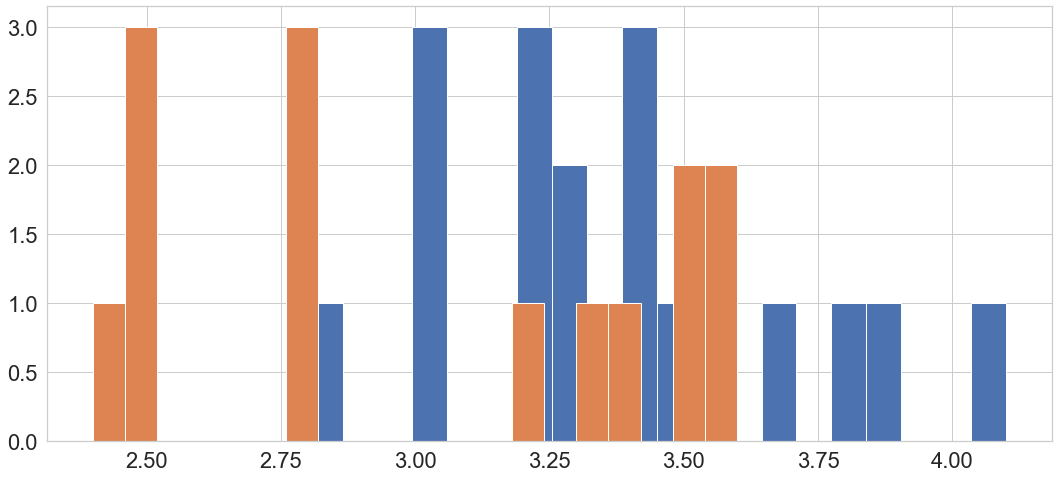

In [21]:
# Посмотрим наглядно

group_1.показатель_5.hist(bins=20) # Показатель_1 меньше 3.6
group_2.показатель_5.hist(bins=20) # Показатель_1 больше 4.7

Из этого следует что с увеличением показателя_1(больше чем в 1й группе), вероятность получить более низкие значения по показателю_5 увеличиваются.

In [22]:
# Но так как у нас очень мало наблюдений(группа_1 = 17, группа_2 = 14), 
# то если многократно повторят Т-тест, выбирая по 14 и меньше наблюдений из групп, 
# мы часто будем получать не значимые статистические различия(p > 0.5).

stats.ttest_ind(group_1.показатель_5.sample(14) , group_2.показатель_5.sample(14))

Ttest_indResult(statistic=1.7641057126819926, pvalue=0.08946235884511283)

In [23]:
# Подберем независимые переменные, которые сильнее всего влияют на ЗП

Y = df.показатель_5 # зависимая переменная
X1 = df.показатель_1
X2 = df.показатель_2
X3 = df.показатель_3
X4 = df.показатель_4
G = df.group

In [24]:
# Самое сильное влияние оказывают номер группы и показателя_4.

results = smf.ols('Y ~ X4 + G', df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     593.4
Date:                Sat, 03 Oct 2020   Prob (F-statistic):           1.19e-23
Time:                        00:03:58   Log-Likelihood:                 41.100
No. Observations:                  31   AIC:                            -76.20
Df Residuals:                      28   BIC:                            -71.90
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5167      0.069     80.388      0.0

Text(72.52426111111112, 0.5, 'Переменная_5')

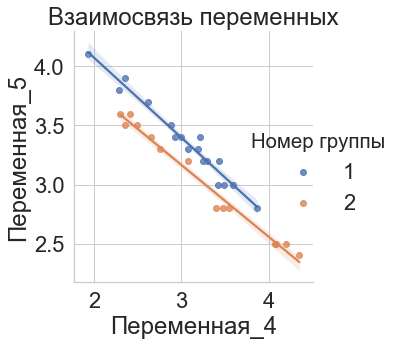

In [25]:
# Отразим графически

g = sns.lmplot(x = 'показатель_4', y = 'показатель_5', data = df, hue = 'group')
g._legend.set_title('Номер группы')
plt.title('Взаимосвязь переменных')
plt.xlabel('Переменная_4')
plt.ylabel('Переменная_5')